In [1]:
!pip install qiskit
!pip install qiskit-Aer
!pip install qiskit-algorithms
!pip install qiskit-optimization
!pip install qiskit-ibm-runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 635.6/635.6 kB 7.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wh

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import time

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QAOAAnsatz, TwoLocal
from qiskit_optimization.applications import Tsp
from qiskit_algorithms.minimum_eigensolvers import SamplingVQE
from qiskit_algorithms.optimizers import SPSA, COBYLA, L_BFGS_B, POWELL
# from qiskit_algorithms.utils import algorithm_globals
from qiskit.primitives import Sampler
from qiskit.quantum_info import Operator, SparsePauliOp
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.converters import QuadraticProgramToQubo
from scipy.optimize import minimize


In [3]:
import pandas as pd

# Read the Excel file
df = pd.read_excel('distance_matrix.xlsx', header=None)

# Convert the DataFrame to a NumPy array
distance_matrix = df.to_numpy()
print(distance_matrix)

[[ 0 10 15 20]
 [10  0 35 25]
 [15 35  0 30]
 [20 35 30  0]]


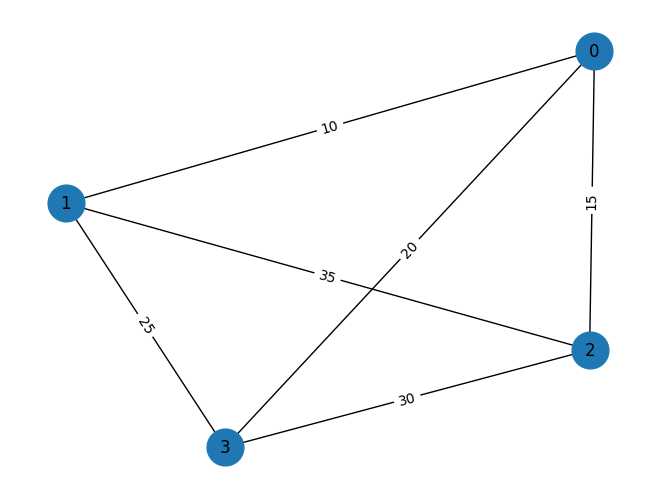

TSP Instance:
Number of nodes: 4
Number of edges: 6


In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
# from qiskit.optimization.applications.ising import Tsp

# Read the Excel file
df = pd.read_excel('distance_matrix.xlsx', header=None)

# Convert the DataFrame to a NumPy array
distance_matrix = df.to_numpy()

# Create a NetworkX graph from the adjacency matrix
G = nx.Graph()

# Add nodes
num_nodes = distance_matrix.shape[0]
for i in range(num_nodes):
    G.add_node(i)

# Add edges with weights
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        G.add_edge(i, j, weight=distance_matrix[i, j])

# Create a TSP instance using the graph
tsp_instance = Tsp(graph=G)

# Draw the graph
pos = nx.spring_layout(G)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_size=700, font_size=12)

# Draw edge labels
edge_labels = {(i, j): G[i][j]['weight'] for i, j in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

# Print the TSP instance details
print("TSP Instance:")
print("Number of nodes:", tsp_instance.graph.number_of_nodes())
print("Number of edges:", tsp_instance.graph.number_of_edges())


In [5]:
qp = tsp_instance.to_quadratic_program()
print(qp.prettyprint())

Problem name: TSP

Minimize
  10*x_0_0*x_1_1 + 10*x_0_0*x_1_3 + 15*x_0_0*x_2_1 + 15*x_0_0*x_2_3
  + 20*x_0_0*x_3_1 + 20*x_0_0*x_3_3 + 10*x_0_1*x_1_0 + 10*x_0_1*x_1_2
  + 15*x_0_1*x_2_0 + 15*x_0_1*x_2_2 + 20*x_0_1*x_3_0 + 20*x_0_1*x_3_2
  + 10*x_0_2*x_1_1 + 10*x_0_2*x_1_3 + 15*x_0_2*x_2_1 + 15*x_0_2*x_2_3
  + 20*x_0_2*x_3_1 + 20*x_0_2*x_3_3 + 10*x_0_3*x_1_0 + 10*x_0_3*x_1_2
  + 15*x_0_3*x_2_0 + 15*x_0_3*x_2_2 + 20*x_0_3*x_3_0 + 20*x_0_3*x_3_2
  + 35*x_1_0*x_2_1 + 35*x_1_0*x_2_3 + 25*x_1_0*x_3_1 + 25*x_1_0*x_3_3
  + 35*x_1_1*x_2_0 + 35*x_1_1*x_2_2 + 25*x_1_1*x_3_0 + 25*x_1_1*x_3_2
  + 35*x_1_2*x_2_1 + 35*x_1_2*x_2_3 + 25*x_1_2*x_3_1 + 25*x_1_2*x_3_3
  + 35*x_1_3*x_2_0 + 35*x_1_3*x_2_2 + 25*x_1_3*x_3_0 + 25*x_1_3*x_3_2
  + 30*x_2_0*x_3_1 + 30*x_2_0*x_3_3 + 30*x_2_1*x_3_0 + 30*x_2_1*x_3_2
  + 30*x_2_2*x_3_1 + 30*x_2_2*x_3_3 + 30*x_2_3*x_3_0 + 30*x_2_3*x_3_2

Subject to
  Linear constraints (8)
    x_0_0 + x_0_1 + x_0_2 + x_0_3 == 1  'c0'
    x_1_0 + x_1_1 + x_1_2 + x_1_3 == 1  'c1'
    x_2

In [6]:
qp2qubo = QuadraticProgramToQubo()
qubo = qp2qubo.convert(qp)
hamiltonian, offset = qubo.to_ising()
print(qubo)
print("====")
print(hamiltonian)
print(hamiltonian.num_qubits)

minimize 2162*x_0_0^2 + 2162*x_0_0*x_0_1 + 2162*x_0_0*x_0_2 + 2162*x_0_0*x_0_3 + 2162*x_0_0*x_1_0 + 10*x_0_0*x_1_1 + 10*x_0_0*x_1_3 + 2162*x_0_0*x_2_0 + 15*x_0_0*x_2_1 + 15*x_0_0*x_2_3 + 2162*x_0_0*x_3_0 + 20*x_0_0*x_3_1 + 20*x_0_0*x_3_3 + 2162*x_0_1^2 + 2162*x_0_1*x_0_2 + 2162*x_0_1*x_0_3 + 10*x_0_1*x_1_0 + 2162*x_0_1*x_1_1 + 10*x_0_1*x_1_2 + 15*x_0_1*x_2_0 + 2162*x_0_1*x_2_1 + 15*x_0_1*x_2_2 + 20*x_0_1*x_3_0 + 2162*x_0_1*x_3_1 + 20*x_0_1*x_3_2 + 2162*x_0_2^2 + 2162*x_0_2*x_0_3 + 10*x_0_2*x_1_1 + 2162*x_0_2*x_1_2 + 10*x_0_2*x_1_3 + 15*x_0_2*x_2_1 + 2162*x_0_2*x_2_2 + 15*x_0_2*x_2_3 + 20*x_0_2*x_3_1 + 2162*x_0_2*x_3_2 + 20*x_0_2*x_3_3 + 2162*x_0_3^2 + 10*x_0_3*x_1_0 + 10*x_0_3*x_1_2 + 2162*x_0_3*x_1_3 + 15*x_0_3*x_2_0 + 15*x_0_3*x_2_2 + 2162*x_0_3*x_2_3 + 20*x_0_3*x_3_0 + 20*x_0_3*x_3_2 + 2162*x_0_3*x_3_3 + 2162*x_1_0^2 + 2162*x_1_0*x_1_1 + 2162*x_1_0*x_1_2 + 2162*x_1_0*x_1_3 + 2162*x_1_0*x_2_0 + 35*x_1_0*x_2_1 + 35*x_1_0*x_2_3 + 2162*x_1_0*x_3_0 + 25*x_1_0*x_3_1 + 25*x_1_0*x_3_3 + 216

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


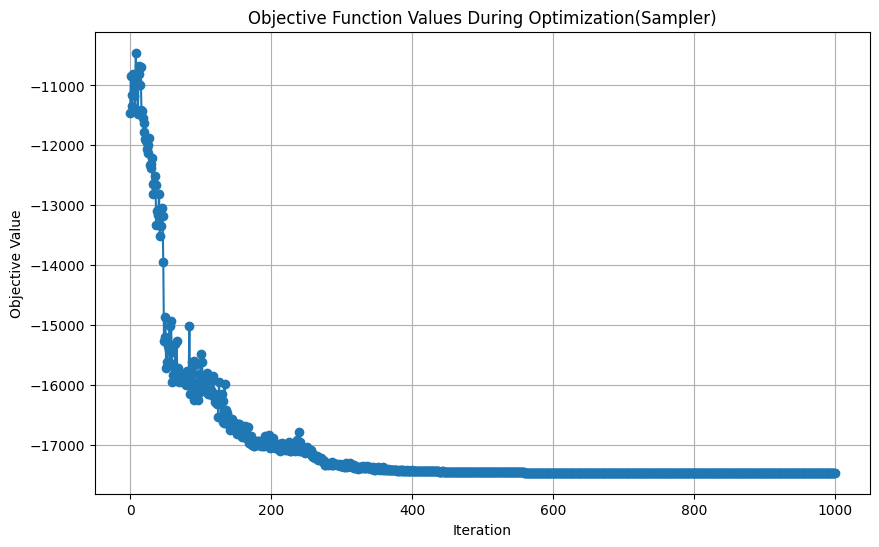

Sampling time 1293.4315502643585


In [7]:
counts = []
values = []
def samplevqe_callback(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)
    # print(f"Current parameters: {parameters}, Objective value: {mean}")

optimizer = COBYLA(maxiter=1000)

# backend = AerSimulator(method="matrix_product_state")

sampler = Sampler()

p = 1

# ansatz = QAOAAnsatz(hamiltonian, reps=p)

ansatz = TwoLocal(hamiltonian.num_qubits, "ry", "rzz", reps=p, entanglement="linear")
init_point = np.random.random(ansatz.num_parameters)

start_time = time.time()
sampling_vqe = SamplingVQE(sampler, ansatz, optimizer, initial_point=init_point, callback=samplevqe_callback)
result_samp = sampling_vqe.compute_minimum_eigenvalue(hamiltonian)
end_time = time.time()

plt.figure(figsize=(10, 6))
plt.plot(values, marker="o")
plt.title("Objective Function Values During Optimization(Sampler)")
plt.xlabel("Iteration")
plt.ylabel("Objective Value")
plt.grid(True)
plt.show()
print("Sampling time", end_time-start_time)

In [8]:
def draw_tsp_solution(G, order, colors, pos):
    G2 = nx.DiGraph()
    G2.add_nodes_from(G)
    n = len(order)
    for i in range(n):
        j = (i + 1) % n
        G2.add_edge(order[i], order[j], weight=G[order[i]][order[j]]["weight"])
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(
        G2, node_color=colors, edge_color="b", node_size=600, alpha=0.8, ax=default_axes, pos=pos
    )
    edge_labels = nx.get_edge_attributes(G2, "weight")
    nx.draw_networkx_edge_labels(G2, pos, font_color="b", edge_labels=edge_labels)


In [10]:
def draw_graph(G, colors, pos):
    """
    Draws the graph G with the specified node colors and positions.

    Parameters:
    G (networkx.Graph): The graph to be drawn.
    colors (list): List of colors for the nodes.
    pos (dict or list): Node positions for drawing.
    """
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, node_color=colors, with_labels=True, node_size=500, font_color='white', font_weight='bold', edge_color='gray')
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()

In [12]:
tsp_instance.graph.nodes


NodeView((0, 1, 2, 3))

feasible: True
solution: [0, 1, 2, 3]
solution objective: 95.0


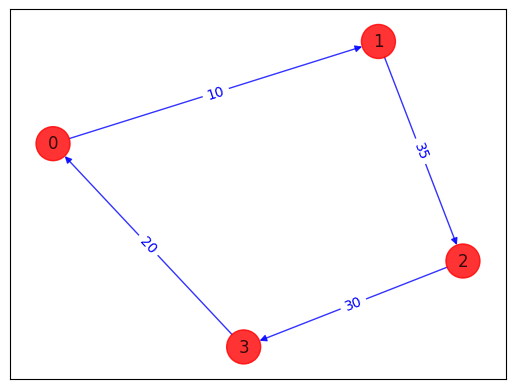

In [15]:
x = tsp_instance.sample_most_likely(result_samp.eigenstate)
print("feasible:", qubo.is_feasible(x))
z = tsp_instance.interpret(x)
print("solution:", z)
print("solution objective:", tsp_instance.tsp_value(z, distance_matrix))
colors = ["r" for node in tsp_instance.graph.nodes]
pos = nx.spring_layout(tsp_instance.graph)
draw_tsp_solution(tsp_instance.graph, z, colors, pos)

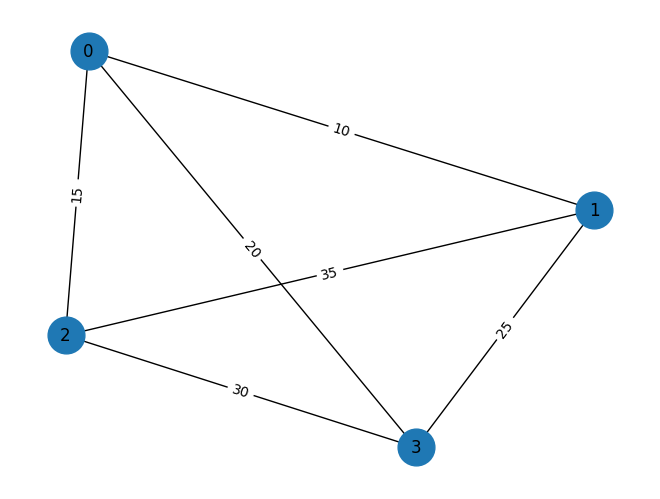

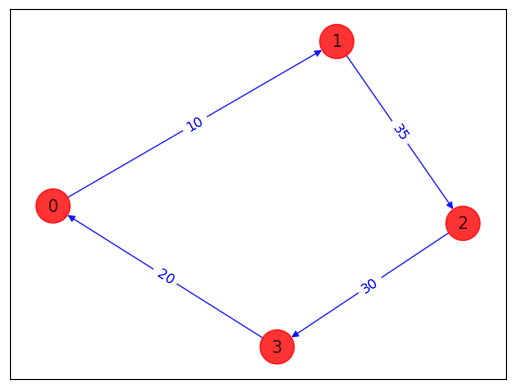

In [17]:
#Problem Network
pos = nx.spring_layout(G)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_size=700, font_size=12)

# Draw edge labels
edge_labels = {(i, j): G[i][j]['weight'] for i, j in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()


#Solution
colors = ["r" for node in tsp_instance.graph.nodes]
pos = nx.spring_layout(tsp_instance.graph)
draw_tsp_solution(tsp_instance.graph, z, colors, pos)

